# 0. Quiz

> 보스턴 주택 가격 데이터 PCA를 이용하여 차원축소하고 KNN을 이용하여 정확도를 구하시오(다음 순서를 참고하여 작성하시오)
1. 데이터 얻기
2. 학습 및 테스트 데이터 나누기
3. 데이터 표준화
4. 주성분데이터 찾기
5. KNN 모델 적용

# 1. 데이터 얻기

In [22]:
import pandas as pd 
from sklearn import datasets

boston_data, boston_target = datasets.fetch_openml('boston', version=1, return_X_y=True)

# 2. 학습 및 테스트 데이터 나누기

In [75]:
boston_data[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=100)

# 3. 데이터 표준화

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# 4. 주성분 데이터 찾기

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_std)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[6.16953904 1.3654163  1.25692997 0.91966421 0.84639008 0.67655275
 0.51650872 0.371627   0.2750049  0.22359446 0.17988884 0.16968284
 0.06359242]
[0.47332774 0.10475489 0.09643181 0.07055674 0.06493514 0.0519052
 0.03962661 0.02851127 0.02109841 0.01715419 0.01380109 0.01301809
 0.00487882]


In [40]:
import numpy as np 

x_length = len(X_train_std[0])
x = np.arange(x_length)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

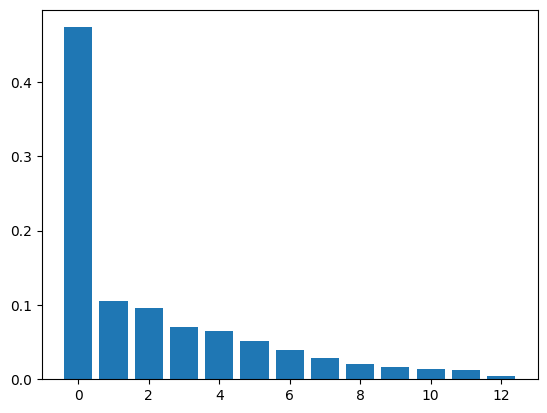

In [41]:
import matplotlib.pyplot as plt 

plt.bar(x, pca.explained_variance_ratio_)
plt.show()

> 실행 결과 첫 번째 feature가 가장 높은 분산량을 갖게 되며 가장 마지막 데이터는 굉장히 미미한 분산량을 갖게 되는 것을 볼 수 있다. 따라서 적당한 feature 개수는 7~9개 정도로 보인다.

# 5. K 최근접 이웃 모델 적용

In [48]:
n_component_size = 3
pca = PCA(n_components=n_component_size)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

학습 세트 정확도 :  0.815
검증 세트 정확도 :  0.554


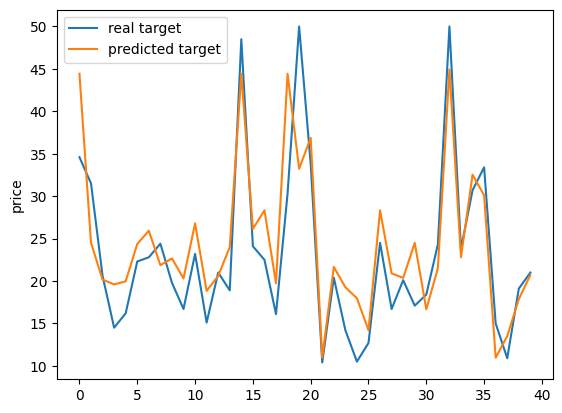

In [50]:
number_of_sample = 40

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

In [70]:
from sklearn.model_selection import cross_val_score

model = KNeighborsRegressor()

def best_params(n_neighbors_list):
    model = KNeighborsRegressor(n_neighbors=n_neighbors_list)
    scores = cross_val_score(model, X_train_pca, y_train, cv=5)

    print(f'{n_neighbors_list} 5 fold당 Score :', scores)
    print('평균 Score :', np.mean(scores))

In [73]:
n_neighbors_list = np.arange(3, 8, 1)

for n in n_neighbors_list: 
    best_params(n)

3 5 fold당 Score : [0.53270229 0.53465758 0.79587692 0.59073651 0.67053751]
평균 Score : 0.6249021602940135
4 5 fold당 Score : [0.51162588 0.58964581 0.81639616 0.63802878 0.68279245]
평균 Score : 0.6476978172870786
5 5 fold당 Score : [0.53656945 0.61042819 0.81415315 0.67391283 0.71048016]
평균 Score : 0.669108757420017
6 5 fold당 Score : [0.54549107 0.61139747 0.83768914 0.68115709 0.68012745]
평균 Score : 0.671172442640784
7 5 fold당 Score : [0.56570049 0.61263299 0.80977981 0.67491512 0.68283046]
평균 Score : 0.6691717756415487


In [74]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

학습 세트 정확도 :  0.77
검증 세트 정확도 :  0.597
